# Test experimental model

This notebook tests the model used for experimental cells runs correctly on a simple step stimulus.

In [1]:
import json
import sys
import os
import time
import neuron
from pathlib import Path
import time

import matplotlib.pyplot as plt

import bluepyopt as bpopt
import bluepyopt.ephys as ephys

import numpy as np

import shutil
from pprint import pprint

import multimodalfitting as mf

import neuroplotlib as nplt

%matplotlib notebook 
#notebook

In [2]:
model_name = "experimental" # "hay", "hay_ais", "hay_ais_hillock"
probe_type = "planar"
base_folder = Path("../..")
cell_models_folder = base_folder / "cell_models"

model_folder = cell_models_folder / f"{model_name}_model"
# data_folder = Path("/gpfs/bbp.cscs.ch/home/mandge/lfpy/multimodalfitting/data/cell1_210301") 
data_folder = base_folder / "data_210916" / "experimental" / "cell1_210301"

In [3]:
morphology = cell_models_folder / f"{model_name}_model" / "morphology_corrected.swc" #data_folder / "morphology" / "morphology_corrected.swc"
probe_file = data_folder / "extracellular" / "probe.json"
params_release = "experimental_model/parameters_abd_release.json"

In [4]:
cell = mf.create_experimental_model(morphology_file=morphology,
                                    cell_model_folder=model_folder,
                                    release=True,
                                    v_init=-70, 
                                    abd=False, model_type="LFPy")
cell_abd = mf.create_experimental_model(morphology_file=morphology,
                                    cell_model_folder=model_folder,
                                    release=True,
                                    v_init=-70, 
                                    abd=True, model_type="LFPy")

Setting v_init to -70
Setting v_init to -70


In [5]:
# define a probe (this can also be defined externally)
probe = mf.define_electrode(probe_file=probe_file)

# define a test protocol
protocols = mf.define_test_step_protocol(step_amplitude=0.5, tot_duration=500, step_duration=400, probe=probe)

# instantiate simulator
sim = ephys.simulators.LFPySimulator(cell, cvode_active=True, electrode=probe, mechs_folders=model_folder)
sim_abd = ephys.simulators.LFPySimulator(cell_abd, cvode_active=True, electrode=probe, mechs_folders=model_folder)

In [ ]:
mf.plot_cell(cell, sim, color="b", color_ais="g", detailed=True)

In [ ]:
mf.plot_cell(cell_abd, sim_abd, color="b", color_ais="g", color_abd="r", detailed=True)

In [6]:
len(list(cell.params.keys()))

62

In [7]:
len(list(cell_abd.params.keys()))

78

In [8]:
cell_abd.freeze({})
cell_abd.instantiate(sim_abd)

Adding ABD sections
0 experimental[0].dend[0] is now experimental[0].abd[0]
1 experimental[0].dend[1] is now experimental[0].abd[1]


In [9]:
lfpy_cell = cell_abd.LFPyCell

In [10]:
for sec in lfpy_cell.allseclist:
    print(sec.name())

experimental[0].soma[0]
experimental[0].axon[0]
experimental[0].dend[2]
experimental[0].dend[3]
experimental[0].dend[4]
experimental[0].dend[5]
experimental[0].dend[6]
experimental[0].dend[7]
experimental[0].dend[8]
experimental[0].dend[9]
experimental[0].dend[10]
experimental[0].dend[11]
experimental[0].dend[12]
experimental[0].dend[13]
experimental[0].dend[14]
experimental[0].dend[15]
experimental[0].dend[16]
experimental[0].dend[17]
experimental[0].dend[18]
experimental[0].dend[19]
experimental[0].dend[20]
experimental[0].dend[21]
experimental[0].dend[22]
experimental[0].dend[23]
experimental[0].dend[24]
experimental[0].dend[25]
experimental[0].dend[26]
experimental[0].dend[27]
experimental[0].dend[28]
experimental[0].dend[29]
experimental[0].dend[30]
experimental[0].dend[31]
experimental[0].dend[32]
experimental[0].dend[33]
experimental[0].dend[34]
experimental[0].dend[35]
experimental[0].dend[36]
experimental[0].dend[37]
experimental[0].dend[38]
experimental[0].dend[39]
experiment

<IPython.core.display.Javascript object>


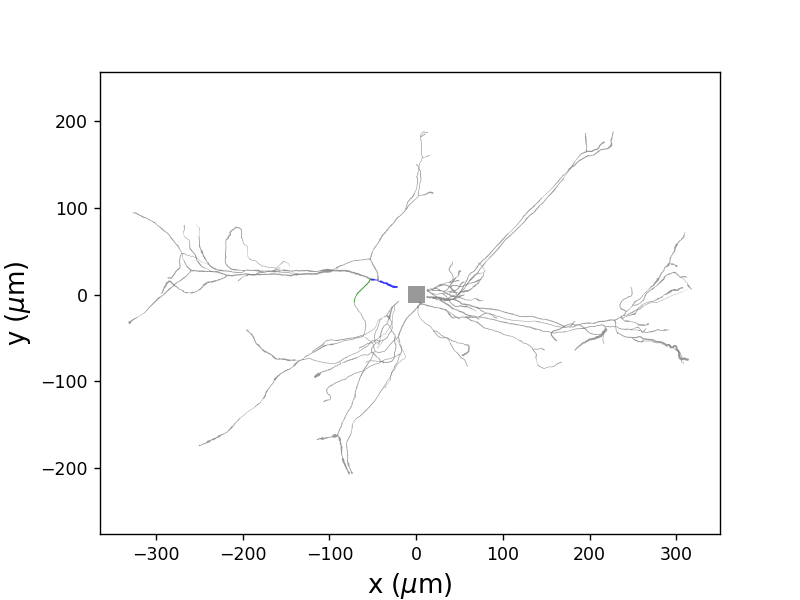

<AxesSubplot:xlabel='x ($\\mu$m)', ylabel='y ($\\mu$m)'>

In [13]:
nplt.plot_detailed_neuron(lfpy_cell, plane="xy", color_ais="g", color_abd="b")